In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Project-ICM\Copper_Set_F.csv")

In [4]:
df=df1.copy()
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
df.shape

(181673, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [8]:
# Checking null values
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [9]:
Null_columns = []
#To get columns with null values
for col in df.columns:
    if df[col].isnull().sum()>0:
        Null_columns.append(col)

In [10]:
for col in Null_columns:
    Percentage = round((df[col].isnull().sum() / df.shape[0]) * 100, 2)
    print(f"{col} has {Percentage}% of null values")

id has 0.0% of null values
item_date has 0.0% of null values
customer has 0.0% of null values
country has 0.02% of null values
status has 0.0% of null values
application has 0.01% of null values
thickness has 0.0% of null values
material_ref has 42.89% of null values
delivery date has 0.0% of null values
selling_price has 0.0% of null values


In [11]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [12]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [13]:
df.columns = ['id', 'item_date', 'quantity_tons', 'customer', 'country', 'status',
       'item_type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery_date', 'selling_price']

In [14]:
df['id'] = df['id'].apply(lambda x: str(x)).fillna(method='bfill')

In [15]:
#found 'e' in quality tons so replacing it with NaN
df['quantity_tons'] = df['quantity_tons'].replace('e', np.NaN).astype(float)

In [16]:
#while changing to date format makes a error
df['item_date']=df['item_date'].replace(19950000,np.NaN)
df['item_date']=df['item_date'].replace(20191919,np.NaN)
df['delivery_date']=df['delivery_date'].replace(30310101,np.NaN)
df['delivery_date']=df['delivery_date'].replace(20212222,np.NaN)

In [17]:
# dealing with data in wrong format
# for categorical variables, this step is ignored
#errors='coerce' during conv if any error occurs it'll manage or no numeric(return NAN)
#.str.lstrip('0') method is used to strip leading characters from each element in the Series/Index from the left side.

df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity_tons'] = pd.to_numeric(df['quantity_tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['application'] = df['application'].apply(lambda x: str(x)).fillna(method='bfill')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].astype(str).fillna('Unknown').str.lstrip('0')
df['material_ref'] = pd.Categorical(df['material_ref'], categories=df['material_ref'].unique())
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce').astype(str)
df['delivery_date'] = pd.to_datetime(df['delivery_date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [18]:
df.dtypes

id                 object
item_date          object
quantity_tons     float64
customer          float64
country           float64
status             object
item_type          object
application        object
thickness         float64
width             float64
material_ref     category
product_ref        object
delivery_date      object
selling_price     float64
dtype: object

In [19]:
#quantity tons and selling_price have a negative values, This is impossible,
# so we need to replace the negative values with null values
df["quantity_tons"]= df["quantity_tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [20]:
Mean = round(df['selling_price'].mean(),3)

df['selling_price'].fillna(Mean,inplace=True)

df['selling_price'] = df['selling_price'].apply(lambda x : float(x))

In [21]:
missing_values = df.isna().sum()

print("Missing Values:")
print(missing_values)

missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Value Percentage:")
print(missing_percentage)

Missing Values:
id                0
item_date         3
quantity_tons     5
customer          1
country          28
status            2
item_type         0
application       0
thickness         1
width             0
material_ref      0
product_ref       0
delivery_date     3
selling_price     0
dtype: int64

Missing Value Percentage:
id               0.000000
item_date        0.001651
quantity_tons    0.002752
customer         0.000550
country          0.015412
status           0.001101
item_type        0.000000
application      0.000000
thickness        0.000550
width            0.000000
material_ref     0.000000
product_ref      0.000000
delivery_date    0.001651
selling_price    0.000000
dtype: float64


In [22]:
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [23]:
df.isnull().sum()

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

In [25]:
# Convert 'item_date' and 'delivery date' to datetime
#df['item_date'] = pd.to_datetime(df['item_date'])
#df['delivery_date'] = pd.to_datetime(df['delivery_date'])
# Calculate the absolute difference in days between 'item_date' and 'delivery date'
#df['delivery_period'] = (df['item_date'] - df['delivery_date']).abs().dt.days
#df

In [26]:
#Cat_Col = [i for i in df.columns if df[i].dtype == 'O']
#Num_col = [i for i in df.columns if i not in Cat_Col]

In [24]:
from scipy.stats import skew

In [25]:
df.select_dtypes(include=['int64', 'float64']).skew()

quantity_tons    424.640554
customer        -149.087305
country            0.753549
thickness        303.471088
width              0.374858
selling_price    301.352418
dtype: float64

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

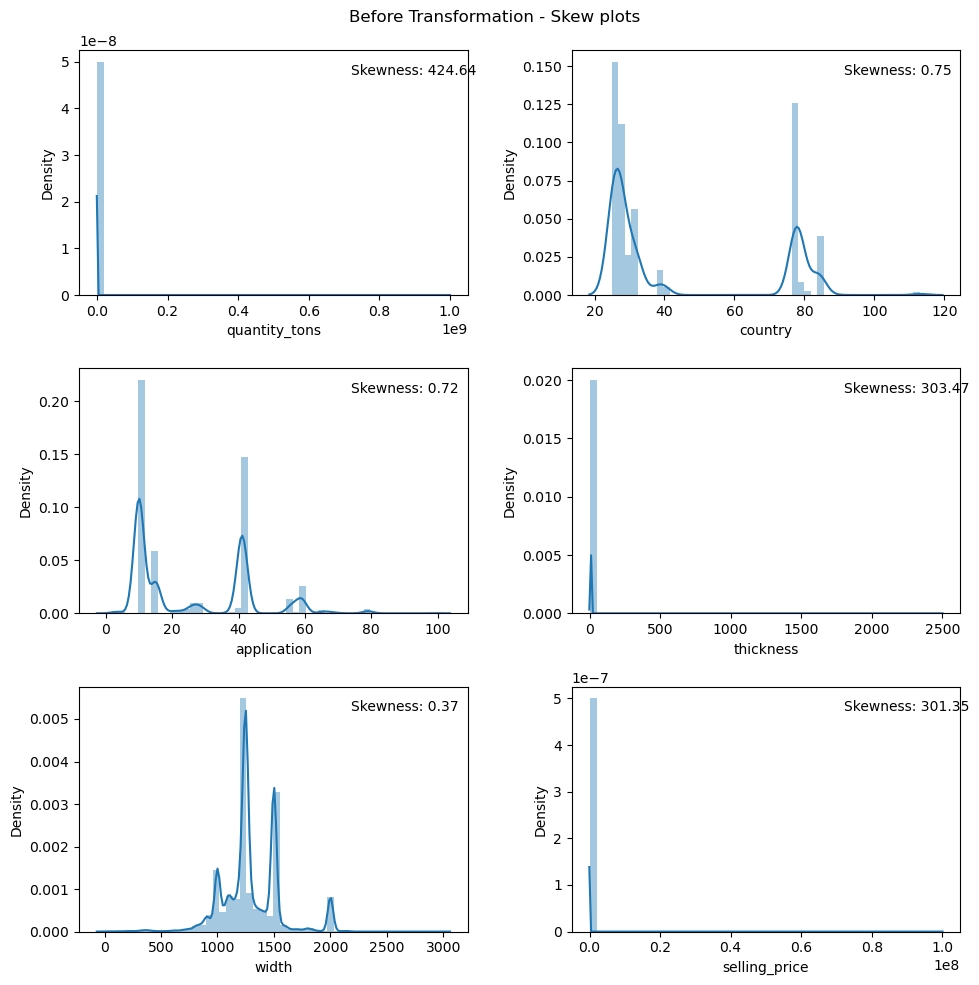

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.distplot(df['quantity_tons'])
skew_value = np.round(df['quantity_tons'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,2)
sns.distplot(df['country'])
skew_value = np.round(df['country'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,3)
sns.distplot(df['application'])
skew_value = np.round(df['application'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,4)
sns.distplot(df['thickness'])
skew_value = np.round(df['thickness'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,5)
sns.distplot(df['width'])
skew_value = np.round(df['width'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,6)
sns.distplot(df['selling_price'])
skew_value = np.round(df['selling_price'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.suptitle('Before Transformation - Skew plots')
plt.tight_layout()
plt.show()

In [30]:
df2 = df.copy()

In [33]:
columns = ['quantity_tons', 'thickness', 'selling_price']

In [34]:
import numpy as np
def log_transformation(column):
  for i in column:
    df2[i] = np.log(df2[i])

log_transformation(columns)

## Before Treating Outliers

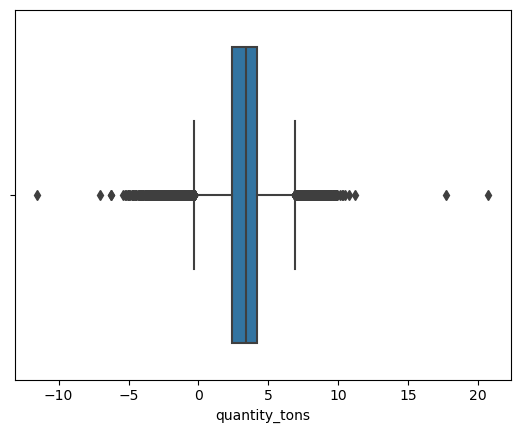

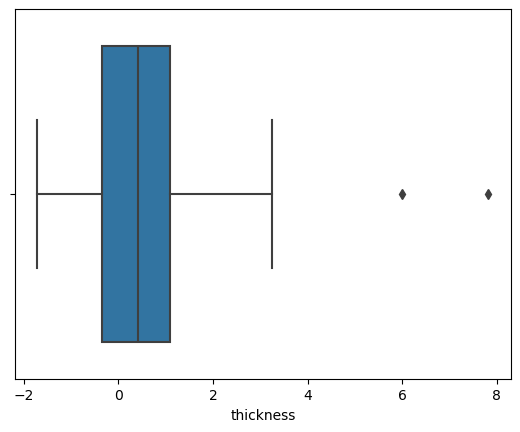

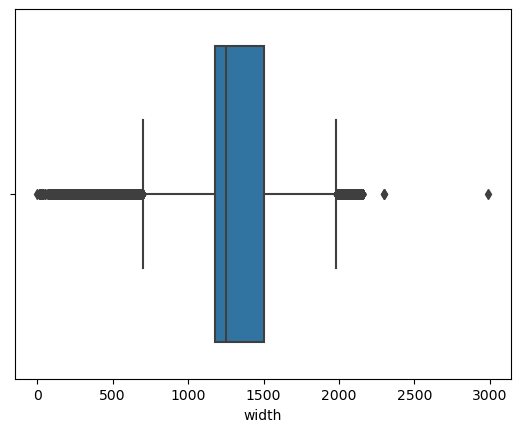

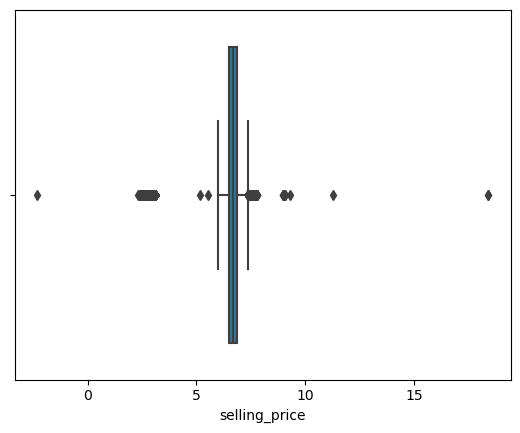

In [31]:
def box_plot(columns):

  for i in columns:
    sns.boxplot(data=df2,x=i)
    plt.show()

box_plot(['quantity_tons','thickness','width','selling_price'])

## After Treating Outliers

In [32]:
def treat_outliers(column):
  for i in column:
    iqr = np.percentile(df2[i],75) - np.percentile(df2[i],25)  # Q3 - Q1
    lower_bound =  np.percentile(df2[i],25) - (1.5 * iqr)
    upper_bound = np.percentile(df2[i],75) + (1.5 * iqr)
    df2[i] = df2[i].clip(lower_bound,upper_bound)
  print('Done !!!!')

treat_outliers(['quantity_tons','thickness','width','selling_price'])

Done !!!!


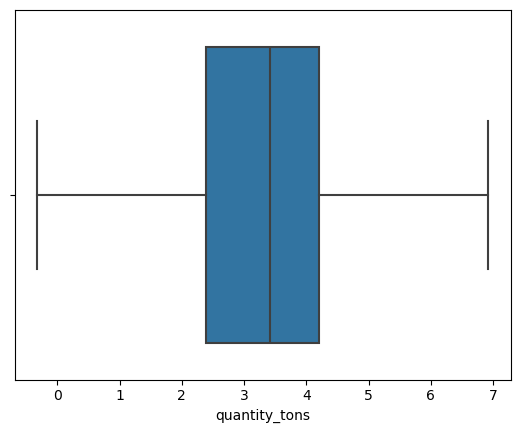

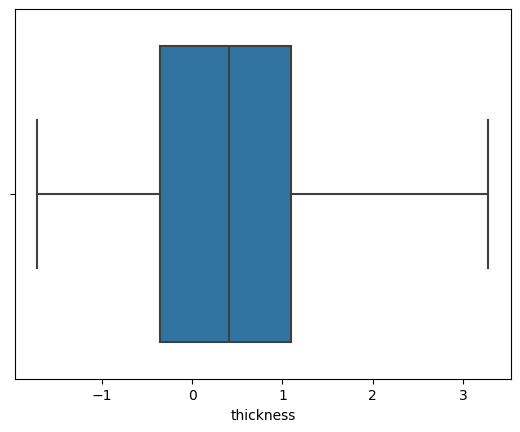

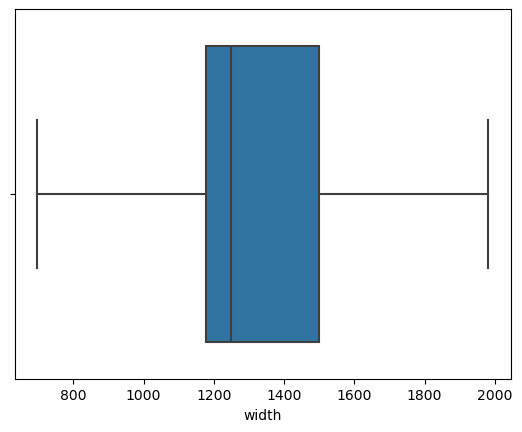

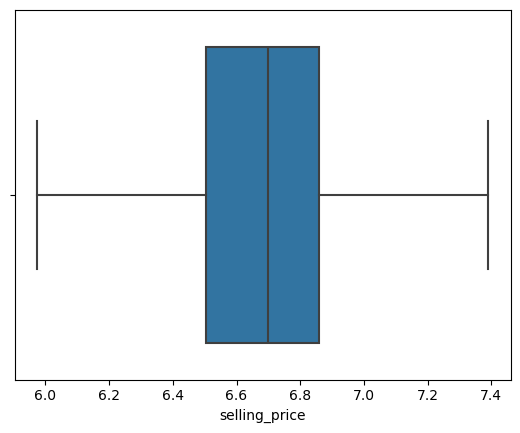

In [33]:
def box_plot(columns):

  for i in columns:
    sns.boxplot(data=df2,x=i)
    plt.show()

box_plot(['quantity_tons','thickness','width','selling_price'])

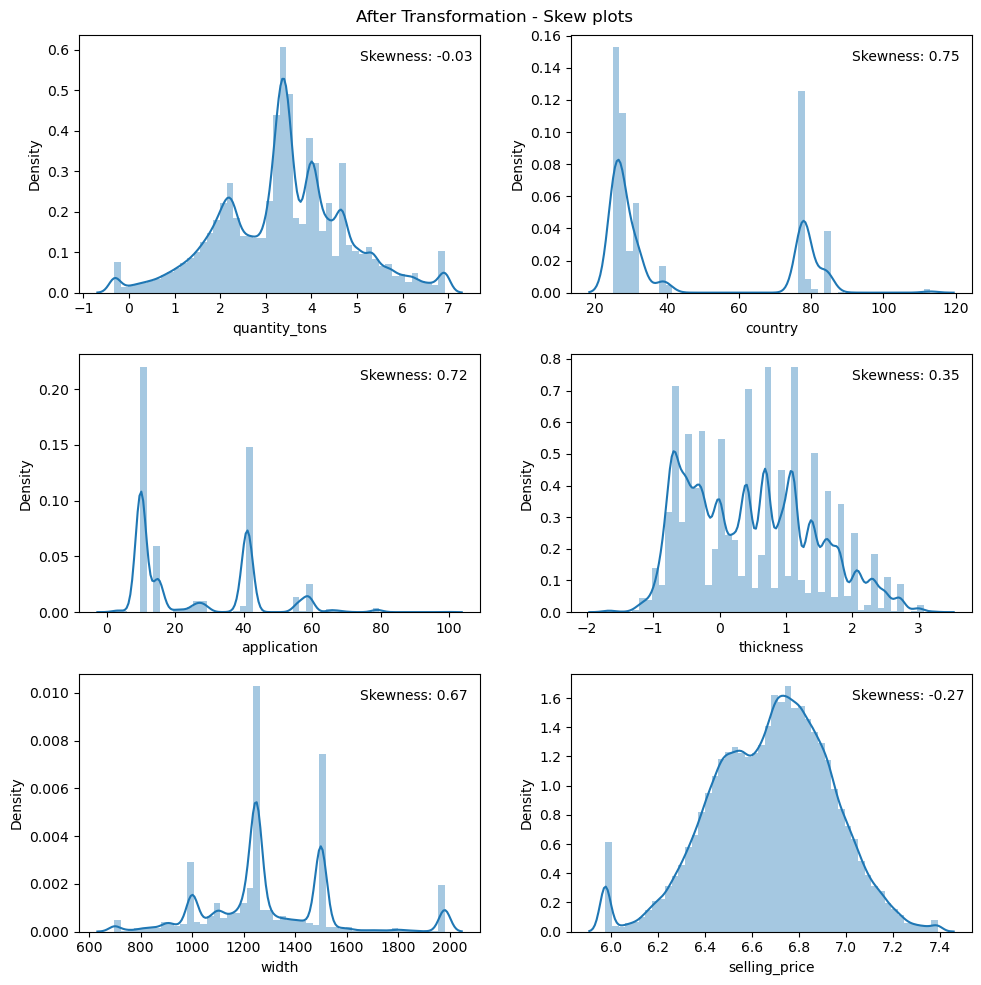

In [34]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.distplot(df2['quantity_tons'])
skew_value = np.round(df2['quantity_tons'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,2)
sns.distplot(df2['country'])
skew_value = np.round(df2['country'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,3)
sns.distplot(df2['application'])
skew_value = np.round(df2['application'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,4)
sns.distplot(df2['thickness'])
skew_value = np.round(df2['thickness'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,5)
sns.distplot(df2['width'])
skew_value = np.round(df2['width'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,6)
sns.distplot(df2['selling_price'])
skew_value = np.round(df2['selling_price'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.suptitle('After Transformation - Skew plots')
plt.tight_layout()
plt.show()

In [35]:
df2.shape

(181630, 14)

In [36]:
df2.columns

Index(['id', 'item_date', 'quantity_tons', 'customer', 'country', 'status',
       'item_type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery_date', 'selling_price'],
      dtype='object')

In [37]:
columns_to_drop = ['id', 'item_date', 'material_ref', 'delivery_date']
df2.drop(columns=columns_to_drop, inplace=True)

In [38]:
ICM_df = df2.copy()

In [39]:
ICM_df

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price
0,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.000,1670798778,6.749931
1,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.000,1668701718,6.953684
2,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.000,628377,6.468211
3,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.000,1668701718,6.643790
4,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,1981.125,640665,6.357842
...,...,...,...,...,...,...,...,...,...,...
181667,4.670802,30200854.0,25.0,Won,W,41.0,-0.040822,1240.000,164141591,6.400257
181668,4.629691,30200854.0,25.0,Won,W,41.0,-0.040822,1220.000,164141591,6.381816
181669,5.337954,30200854.0,25.0,Won,W,41.0,-0.051293,1500.000,164141591,6.378426
181670,1.443523,30200854.0,25.0,Won,W,41.0,-0.342490,1250.000,164141591,6.428105


# Correlation

In [43]:
# values close to 1 indicate a strong positive correlation, 
# values close to -1 indicate a strong negative correlation, 
# and values close to 0 indicate little to no correlation.

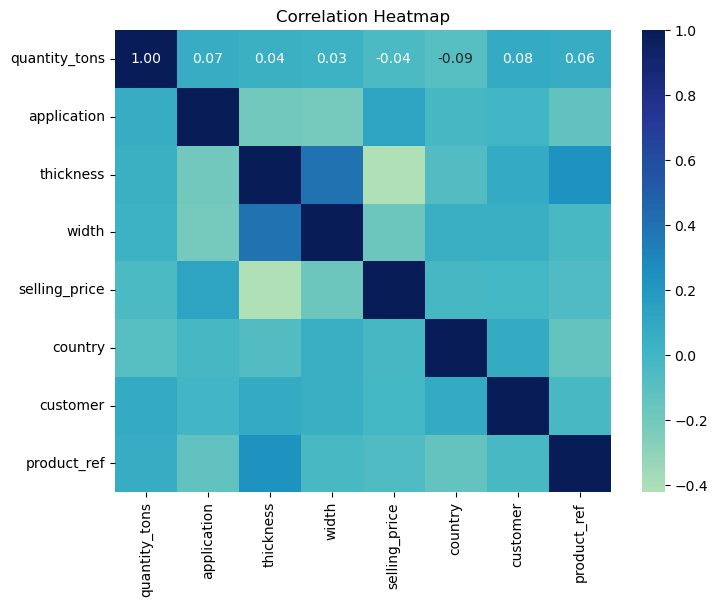

In [40]:
x=ICM_df[['quantity_tons','application','thickness','width','selling_price','country','customer','product_ref']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(x, annot=True, fmt=".2f", cmap="YlGnBu", center=0)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# Convert Categorical data into continous data
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [42]:
# Before Conversion
ICM_df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [43]:
# Conversion Process
ICM_df['status'] = ICM_df['status'].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':5,
       'Wonderful':6, 'Revised':7, 'Offered':8, 'Offerable':4})

In [44]:
# After Conversion
ICM_df['status'].unique()

array([1, 2, 3, 0, 5, 6, 7, 8, 4], dtype=int64)

In [45]:
# Before Converion
ICM_df['item_type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [46]:
# Conversion Process
ICM_df['item_type'] = encoder.fit_transform(ICM_df[['item_type']])

In [47]:
# After Conversion
ICM_df['item_type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [48]:
ICM_df = ICM_df.query('status==1 or status ==0')

In [49]:
ICM_df

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price
0,3.991779,30156308.0,28.0,1,5.0,10.0,0.693147,1500.000,1670798778,6.749931
1,6.643822,30202938.0,25.0,1,5.0,41.0,-0.223144,1210.000,1668701718,6.953684
2,5.956169,30153963.0,30.0,1,6.0,28.0,-0.967584,952.000,628377,6.468211
3,5.310301,30349574.0,32.0,1,3.0,59.0,0.832909,1317.000,1668701718,6.643790
4,6.666354,30211560.0,28.0,1,5.0,10.0,1.386294,1981.125,640665,6.357842
...,...,...,...,...,...,...,...,...,...,...
181667,4.670802,30200854.0,25.0,1,5.0,41.0,-0.040822,1240.000,164141591,6.400257
181668,4.629691,30200854.0,25.0,1,5.0,41.0,-0.040822,1220.000,164141591,6.381816
181669,5.337954,30200854.0,25.0,1,5.0,41.0,-0.051293,1500.000,164141591,6.378426
181670,1.443523,30200854.0,25.0,1,5.0,41.0,-0.342490,1250.000,164141591,6.428105


In [50]:
ICM_df.status.value_counts()

status
1    116002
0     34432
Name: count, dtype: int64

In [52]:
ICM_df["item_type"].value_counts()

item_type
5.0    91950
3.0    52457
2.0     5032
6.0      504
1.0      463
0.0       27
4.0        1
Name: count, dtype: int64

In [53]:
ICM_df.to_csv('cleaned_data_ICM.csv', index=False)

In [55]:
df2

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price
0,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.000,1670798778,6.749931
1,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.000,1668701718,6.953684
2,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.000,628377,6.468211
3,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.000,1668701718,6.643790
4,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,1981.125,640665,6.357842
...,...,...,...,...,...,...,...,...,...,...
181667,4.670802,30200854.0,25.0,Won,W,41.0,-0.040822,1240.000,164141591,6.400257
181668,4.629691,30200854.0,25.0,Won,W,41.0,-0.040822,1220.000,164141591,6.381816
181669,5.337954,30200854.0,25.0,Won,W,41.0,-0.051293,1500.000,164141591,6.378426
181670,1.443523,30200854.0,25.0,Won,W,41.0,-0.342490,1250.000,164141591,6.428105


In [56]:
# Before Conversion
df2['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [58]:
# Conversion Process
df2['status'] = df2['status'].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':5,
       'Wonderful':6, 'Revised':7, 'Offered':8, 'Offerable':4})

In [59]:
# After Conversion
df2['status'].unique()

array([1, 2, 3, 0, 5, 6, 7, 8, 4], dtype=int64)

In [60]:
# Before Converion
df2['item_type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [61]:
# Conversion Process
df2['item_type'] = encoder.fit_transform(df2[['item_type']])

In [62]:
# After Conversion
df2['item_type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [63]:
df2.status.value_counts()

status
1    116002
0     34432
5     19568
7      4276
3      4168
2      3120
8        53
4        10
6         1
Name: count, dtype: int64

In [64]:
df2["item_type"].value_counts()

item_type
5.0    105607
3.0     69201
2.0      5660
1.0       610
6.0       524
0.0        27
4.0         1
Name: count, dtype: int64

In [65]:
df2.to_csv('cleaned_data_ICM_rpred.csv', index=False)

# Its done

## Unbalanced Data

In [54]:
ICM_df.status.value_counts(normalize=True)*100

status
1    77.111557
0    22.888443
Name: proportion, dtype: float64

### Rectify Balanced Data -- Using Oversampling

In [55]:
x = ICM_df.drop('status',axis=1)
y = ICM_df['status']

In [56]:
x

,quantity_tons,customer,country,item_type,application,thickness,width,product_ref,selling_price
0,3.991779,30156308.0,28.0,5.0,10.0,0.693147,1500.000,1670798778,6.749931
1,6.643822,30202938.0,25.0,5.0,41.0,-0.223144,1210.000,1668701718,6.953684
2,5.956169,30153963.0,30.0,6.0,28.0,-0.967584,952.000,628377,6.468211
3,5.310301,30349574.0,32.0,3.0,59.0,0.832909,1317.000,1668701718,6.643790
4,6.666354,30211560.0,28.0,5.0,10.0,1.386294,1981.125,640665,6.357842
...,...,...,...,...,...,...,...,...,...
181667,4.670802,30200854.0,25.0,5.0,41.0,-0.040822,1240.000,164141591,6.400257
181668,4.629691,30200854.0,25.0,5.0,41.0,-0.040822,1220.000,164141591,6.381816
181669,5.337954,30200854.0,25.0,5.0,41.0,-0.051293,1500.000,164141591,6.378426
181670,1.443523,30200854.0,25.0,5.0,41.0,-0.342490,1250.000,164141591,6.428105


In [57]:
y

0         1
1         1
2         1
3         1
4         1
         ..
181667    1
181668    1
181669    1
181670    1
181672    1
Name: status, Length: 150434, dtype: int64

In [58]:
from imblearn.combine import SMOTETomek
model = SMOTETomek()
x_new , y_new = model.fit_resample(x,y)
x_new.shape,y_new.shape

((225688, 9), (225688,))

In [59]:
y_new.value_counts(normalize=True)

status
1    0.5
0    0.5
Name: proportion, dtype: float64

In [60]:
x_new

,quantity_tons,customer,country,item_type,application,thickness,width,product_ref,selling_price
0,3.991779,30156308.0,28.0,5.0,10.0,0.693147,1500.000000,1670798778.0,6.749931
1,6.643822,30202938.0,25.0,5.0,41.0,-0.223144,1210.000000,1668701718.0,6.953684
2,5.956169,30153963.0,30.0,6.0,28.0,-0.967584,952.000000,628377.0,6.468211
3,5.310301,30349574.0,32.0,3.0,59.0,0.832909,1317.000000,1668701718.0,6.643790
4,6.666354,30211560.0,28.0,5.0,10.0,1.386294,1981.125000,640665.0,6.357842
...,...,...,...,...,...,...,...,...,...
225683,4.796711,30161943.0,40.0,3.0,10.0,1.046695,1250.000000,640665.0,6.240291
225684,3.098127,30165529.0,78.0,5.0,10.0,2.079442,1080.000000,640665.0,6.491815
225685,4.640140,30341862.0,27.0,3.0,40.0,0.419911,1368.020076,1668701718.0,6.915542
225686,3.489563,30202870.0,32.0,3.0,10.0,-0.405241,1250.000000,1332077137.0,6.486362


In [61]:
y_new

0         1
1         1
2         1
3         1
4         1
         ..
225683    0
225684    0
225685    0
225686    0
225687    0
Name: status, Length: 225688, dtype: int64

In [62]:
x_new['status'] = y_new
x_new.to_csv('classification_dataset_ICM_df.csv',index=False)

In [63]:
x_new

,quantity_tons,customer,country,item_type,application,thickness,width,product_ref,selling_price,status
0,3.991779,30156308.0,28.0,5.0,10.0,0.693147,1500.000000,1670798778.0,6.749931,1
1,6.643822,30202938.0,25.0,5.0,41.0,-0.223144,1210.000000,1668701718.0,6.953684,1
2,5.956169,30153963.0,30.0,6.0,28.0,-0.967584,952.000000,628377.0,6.468211,1
3,5.310301,30349574.0,32.0,3.0,59.0,0.832909,1317.000000,1668701718.0,6.643790,1
4,6.666354,30211560.0,28.0,5.0,10.0,1.386294,1981.125000,640665.0,6.357842,1
...,...,...,...,...,...,...,...,...,...,...
225683,4.796711,30161943.0,40.0,3.0,10.0,1.046695,1250.000000,640665.0,6.240291,0
225684,3.098127,30165529.0,78.0,5.0,10.0,2.079442,1080.000000,640665.0,6.491815,0
225685,4.640140,30341862.0,27.0,3.0,40.0,0.419911,1368.020076,1668701718.0,6.915542,0
225686,3.489563,30202870.0,32.0,3.0,10.0,-0.405241,1250.000000,1332077137.0,6.486362,0


### Model Building

#### To Predict the Selling price, Regression Model is used.

In [64]:
ICM_df_rdf = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Project-ICM\classification_dataset_ICM_df.csv")
ICM_df_rdf

,quantity_tons,customer,country,item_type,application,thickness,width,product_ref,selling_price,status
0,3.991779,30156308.0,28.0,5.0,10.0,0.693147,1500.000000,1.670799e+09,6.749931,1
1,6.643822,30202938.0,25.0,5.0,41.0,-0.223144,1210.000000,1.668702e+09,6.953684,1
2,5.956169,30153963.0,30.0,6.0,28.0,-0.967584,952.000000,6.283770e+05,6.468211,1
3,5.310301,30349574.0,32.0,3.0,59.0,0.832909,1317.000000,1.668702e+09,6.643790,1
4,6.666354,30211560.0,28.0,5.0,10.0,1.386294,1981.125000,6.406650e+05,6.357842,1
...,...,...,...,...,...,...,...,...,...,...
225683,4.796711,30161943.0,40.0,3.0,10.0,1.046695,1250.000000,6.406650e+05,6.240291,0
225684,3.098127,30165529.0,78.0,5.0,10.0,2.079442,1080.000000,6.406650e+05,6.491815,0
225685,4.640140,30341862.0,27.0,3.0,40.0,0.419911,1368.020076,1.668702e+09,6.915542,0
225686,3.489563,30202870.0,32.0,3.0,10.0,-0.405241,1250.000000,1.332077e+09,6.486362,0


In [65]:
ICM_df_rdf.columns

Index(['quantity_tons', 'customer', 'country', 'item_type', 'application',
       'thickness', 'width', 'product_ref', 'selling_price', 'status'],
      dtype='object')

In [66]:
ICM_df_rdf = ICM_df_rdf[['quantity_tons', 'customer', 'country', 'item_type', 'application',
       'thickness', 'width', 'product_ref', 'selling_price', 'status']]

In [67]:
x = ICM_df_rdf.drop('selling_price',axis=1)
y = ICM_df_rdf['selling_price']

In [68]:
x

,quantity_tons,customer,country,item_type,application,thickness,width,product_ref,status
0,3.991779,30156308.0,28.0,5.0,10.0,0.693147,1500.000000,1.670799e+09,1
1,6.643822,30202938.0,25.0,5.0,41.0,-0.223144,1210.000000,1.668702e+09,1
2,5.956169,30153963.0,30.0,6.0,28.0,-0.967584,952.000000,6.283770e+05,1
3,5.310301,30349574.0,32.0,3.0,59.0,0.832909,1317.000000,1.668702e+09,1
4,6.666354,30211560.0,28.0,5.0,10.0,1.386294,1981.125000,6.406650e+05,1
...,...,...,...,...,...,...,...,...,...
225683,4.796711,30161943.0,40.0,3.0,10.0,1.046695,1250.000000,6.406650e+05,0
225684,3.098127,30165529.0,78.0,5.0,10.0,2.079442,1080.000000,6.406650e+05,0
225685,4.640140,30341862.0,27.0,3.0,40.0,0.419911,1368.020076,1.668702e+09,0
225686,3.489563,30202870.0,32.0,3.0,10.0,-0.405241,1250.000000,1.332077e+09,0


In [69]:
y

0         6.749931
1         6.953684
2         6.468211
3         6.643790
4         6.357842
            ...   
225683    6.240291
225684    6.491815
225685    6.915542
225686    6.486362
225687    6.856930
Name: selling_price, Length: 225688, dtype: float64

In [70]:
def model_regression(x,y,algorithm):
  for i in algorithm:
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
    model = i().fit(xtrain,ytrain)
    
    # predict for train and test accuracy
    y_train_pred = model.predict(xtrain)
    y_test_pred  = model.predict(xtest)

    # Accuracy score
    training = r2_score(ytrain,y_train_pred)
    testing = r2_score(ytest,y_test_pred)
    data = {'Algorithm':i.__name__, 'Training R2 Score':training,'Testing R2 Score':testing}
    print(data)

In [71]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [72]:
%%time
model_regression(x,y,[DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,XGBRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 0.997889626692492, 'Testing R2 Score': 0.5495963931208572}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 0.9978097018674658, 'Testing R2 Score': 0.692505480529783}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9616395095151868, 'Testing R2 Score': 0.7336088962634933}
{'Algorithm': 'AdaBoostRegressor', 'Training R2 Score': 0.3603315637905785, 'Testing R2 Score': 0.35908748447626193}
{'Algorithm': 'GradientBoostingRegressor', 'Training R2 Score': 0.4551940045046592, 'Testing R2 Score': 0.453339323922897}
{'Algorithm': 'XGBRegressor', 'Training R2 Score': 0.647802221348456, 'Testing R2 Score': 0.6290867602748573}


### Hyperparameter tuning with Grid-Search CV

In [73]:
%%time
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

parameters_r= {"max_depth": [2,4,10,20],
               "min_samples_split": [2,5,10],
               "min_samples_leaf": [1,2,4],
               "max_features": ["sqrt","log2",None]}

gridsearch_r= GridSearchCV(estimator= RandomForestRegressor(), param_grid= parameters_r, cv= 5,n_jobs=-1)
gridsearch_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [78]:
%%time
from sklearn.model_selection import RandomizedSearchCV
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': np.arange(10, 101, 10),
    'max_depth': [None] + list(np.arange(10, 101, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

random_search= RandomizedSearchCV(estimator= RandomForestRegressor(random_state=42), param_distributions=param_distributions, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42, scoring='neg_mean_squared_error')

In [75]:
gridsearch_r.best_score_

0.7279840959154912

In [77]:
gridsearch_r.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [79]:
random_search.best_score_

-0.014496980320673595

In [80]:
random_search.best_params_

{'n_estimators': 90,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 60}

## End this

In [82]:
quantity_tons = float(input('Enter the Quantity Ton value :'))

customer = float(input('Enter the cusomer value :'))

country = float(input('Enter the country code :'))

status = float(input('Enter the  status :'))

item_type = float(input('Enter the item type value :'))

application = float(input('Enter the application value :'))

thickness = float(input('Enter the thickness value :'))

width = float(input('Enter the width value :'))

product_ref = float(input('Enter the product ref value :'))


Enter the Quantity Ton value :1.849617
Enter the cusomer value :30160378
Enter the country code :78
Enter the  status :2
Enter the item type value :5
Enter the application value :3.713572
Enter the thickness value :-0.356675
Enter the width value :7.129298
Enter the product ref value :611993


In [88]:
x = ICM_df_rdf.loc[10000]

In [89]:
x.values.tolist()

[6.925152166354773,
 30198657.0,
 32.0,
 5.0,
 41.0,
 1.0986122886681098,
 1500.0,
 640665.0,
 6.70073110954781,
 1.0]